In [ ]:
#
# Julia/InfiniteOpt version of code adapted from
# https://github.com/rawlings-group/paresto/blob/master/examples/green_book/bvsm.m
#

In [1]:
using CSV, DataFrames
using Plots
using Interpolations
using InfiniteOpt
using JuMP, Ipopt

In [4]:
Qf_data = CSV.read("data_sets/flow.dat", DataFrame, header = ["tQf", "Qf", "c3"], delim = ' ', ignorerepeated = true)

,tQf,Qf,c3
,Float64,Float64,Float64
1,9.0,0.0978178,4.786
2,19.0,1.2906,14.218
3,29.0,1.26278,13.998
4,39.0,1.24002,13.818
5,49.0,1.21574,13.626
6,59.0,1.18716,13.4
7,69.0,1.1606,13.19
8,79.0,0.554596,8.398
9,89.0,1.10951,12.786


In [8]:
tQf = append!([0.0], Qf_data.tQf)
Qf = append!([0.0], Qf_data.Qf/0.728)

88-element Vector{Float64}:
 0.0
 0.1343651620879121
 1.7728035714285717
 1.7345865384615387
 1.7033186813186814
 1.6699670329670329
 1.6307087912087914
 1.5942293956043956
 0.7618078296703298
 1.5240494505494504
 1.870776098901099
 1.8301277472527473
 1.7783626373626373
 ⋮
 0.14555206043956043
 0.0009205970192307693
 0.09354318543956044
 0.0011986428571428573
 0.0013375348076923078
 0.0011985773763736264
 0.0010943675137362638
 0.0009901575686813188
 0.0007817706181318682
 0.0006428786675824176
 0.0007123082554945056
 0.0006080656043956044

In [10]:
Qf_itl = ConstantInterpolation(tQf, Qf)

88-element extrapolate(interpolate((::Vector{Float64},), ::Vector{Float64}, Gridded(Constant{Nearest}())), Throw()) with element type Float64:
 0.0
 0.1343651620879121
 1.7728035714285717
 1.7345865384615387
 1.7033186813186814
 1.6699670329670329
 1.6307087912087914
 1.5942293956043956
 0.7618078296703298
 1.5240494505494504
 1.870776098901099
 1.8301277472527473
 1.7783626373626373
 ⋮
 0.14555206043956043
 0.0009205970192307693
 0.09354318543956044
 0.0011986428571428573
 0.0013375348076923078
 0.0011985773763736264
 0.0010943675137362638
 0.0009901575686813188
 0.0007817706181318682
 0.0006428786675824176
 0.0007123082554945056
 0.0006080656043956044

In [11]:
tQf_i = 0:1:maximum(tQf)
Qf_i = Qf_itl.(tQf_i)

870-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.1343651620879121
 0.1343651620879121
 0.1343651620879121
 0.1343651620879121
 0.1343651620879121
 0.1343651620879121
 0.1343651620879121
 0.1343651620879121
 ⋮
 0.0007123082554945056
 0.0007123082554945056
 0.0007123082554945056
 0.0007123082554945056
 0.0007123082554945056
 0.0007123082554945056
 0.0006080656043956044
 0.0006080656043956044
 0.0006080656043956044
 0.0006080656043956044
 0.0006080656043956044
 0.0006080656043956044

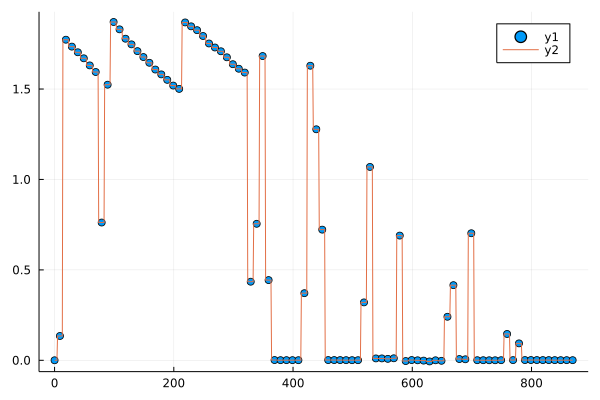

In [12]:
plot(tQf, Qf, seriestype = :scatter)
plot!(tQf_i, Qf_i)

In [13]:
lc_data = CSV.read("data_sets/lc.dat", header = ["tlc", "lc"], DataFrame, delim = " ", ignorerepeated = true)

,tlc,lc
,Int64,Float64
1,414,0.1705
2,424,0.1604
3,434,0.1325
4,444,0.1084
5,493,0.1014
6,503,0.1042
7,513,0.1045
8,523,0.097
9,533,0.0824


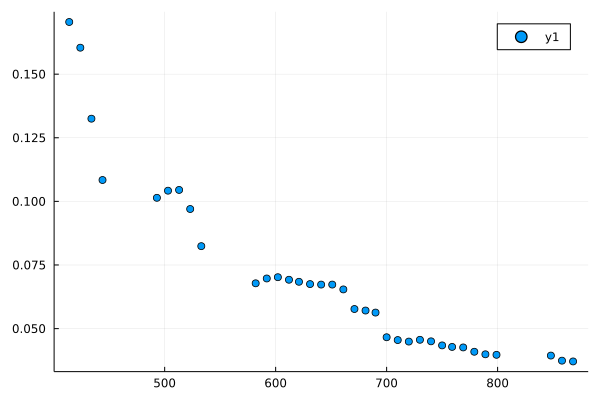

In [14]:
plot(lc_data.tlc, lc_data.lc, seriestype = :scatter)

In [19]:
tlist = unique(sort(vcat(collect(range(0.0, 870.0, length = 200)), tQf, lc_data.tlc)))

317-element Vector{Float64}:
   0.0
   4.371859296482412
   8.743718592964823
   9.0
  13.115577889447236
  17.487437185929647
  19.0
  21.85929648241206
  26.231155778894472
  29.0
  30.603015075376884
  34.97487437185929
  39.0
   ⋮
 848.0
 848.1407035175879
 849.0
 852.5125628140704
 856.8844221105528
 858.0
 859.0
 861.2562814070352
 865.6281407035176
 868.0
 869.0
 870.0

In [31]:
cBf = 0.00721

0.00721

In [34]:
opt = Ipopt.Optimizer    
m = InfiniteModel(opt)

An InfiniteOpt Model
Feasibility problem with:
Finite Parameters: 0
Infinite Parameters: 0
Variables: 0
Derivatives: 0
Measures: 0
Optimizer model backend information: 
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Ipopt

In [35]:
@infinite_parameter(m, t in [0, 870.0], supports = tlist)

t

In [36]:
@variables(m, 
    begin
        vR, Infinite(t)
        nA, Infinite(t)
        nB, Infinite(t)
        nC, Infinite(t)
        nD, Infinite(t)
    end
    )

(vR(t), nA(t), nB(t), nC(t), nD(t))

In [37]:
@variable(m, k1 >= 0, start = 0.5)
@variable(m, k2 >= 0, start = 0.5)

k2

In [43]:
@constraint(m, @deriv(vR, t) == Qf_itl(t))

LoadError: MethodError: no method matching (::Interpolations.Extrapolation{Float64, 1, Interpolations.GriddedInterpolation{Float64, 1, Float64, Gridded{Constant{Nearest, Throw{OnGrid}}}, Tuple{Vector{Float64}}}, Gridded{Constant{Nearest, Throw{OnGrid}}}, Throw{Nothing}})(::GeneralVariableRef)
Use square brackets [] for indexing an Array.
[0mClosest candidates are:
[0m  (::Interpolations.Extrapolation{T, N, ITPT, IT, ET} where {ITPT, IT, ET})([91m::Number...[39m) where {T, N} at /home/paperspace/.julia/packages/Interpolations/Glp9h/src/extrapolation/extrapolation.jl:45
[0m  (::Interpolations.Extrapolation{T, N, ITPT, IT, ET} where {ITPT, IT, ET})([91m::Union{Number, AbstractVector{T} where T}...[39m) where {T, N} at /home/paperspace/.julia/packages/Interpolations/Glp9h/src/extrapolation/extrapolation.jl:54

In [40]:
#@constraint(m, @deriv(vR, t) == Qf_itl(t))
@constraint(m, @deriv(nA, t) == -k1 * nA * nB / vR)
#@constraint(m, @deriv(nB, t) == Qf_itl(t) * cBf - nB * (k1 * nA + k2 * nC) / vR)
@constraint(m, @deriv(nC, t) == nB * (k1 * nA - k2 * nC) / vR)
@constraint(m, @deriv(nD, t) == k2 * nB * nC / vR)

∂/∂t[nD(t)] - k2 * nB(t) * nC(t) * 1 / vR(t) = 0.0, ∀ t ∈ [0, 870]

In [42]:
Qf_itl(10)

0.1343651620879121

In [44]:
typeof(Qf_itl)

Interpolations.Extrapolation{Float64, 1, Interpolations.GriddedInterpolation{Float64, 1, Float64, Gridded{Constant{Nearest, Throw{OnGrid}}}, Tuple{Vector{Float64}}}, Gridded{Constant{Nearest, Throw{OnGrid}}}, Throw{Nothing}}